In [179]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [180]:
n_task_per_file = 50
n_files = 10
#base_dir = "toy_eg_stage1_"#
base_dir = "proportional/toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [181]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [182]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.666667,0.714286,0.500000,0.333333,0.000000,0.833333
1,0.833333,0.833333,0.500000,0.333333,0.600000,1.000000
0,0.666667,0.833333,0.428571,0.166667,0.000000,1.000000
1,0.666667,1.000000,0.500000,0.000000,0.166667,1.000000
0,0.500000,0.833333,0.800000,0.666667,0.500000,0.833333
1,0.600000,0.800000,0.500000,0.333333,0.600000,0.800000
0,0.857143,0.833333,0.428571,0.285714,0.000000,1.000000
0,0.833333,0.833333,0.500000,0.142857,0.333333,0.666667
0,0.833333,0.800000,0.500000,0.500000,0.600000,0.833333
0,0.500000,0.833333,0.500000,0.166667,0.500000,0.833333


In [183]:

length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.216947,41.146539,21.305821,12.474840,9.756086,2.321134
1,0.220322,38.684030,16.263153,11.682569,8.588546,1.161967
0,0.221613,35.562813,18.954538,12.634527,9.026055,0.909779
1,0.211585,47.717378,18.360162,10.919629,9.607704,0.627883
0,0.218162,44.679855,20.007019,11.953883,10.075559,0.355337
1,0.193575,37.368433,16.311056,11.459808,8.410688,0.484062
0,0.234343,47.270565,19.785677,12.065034,9.335283,0.906817
0,0.214819,36.923088,17.829088,10.930176,8.417917,3.684127
0,0.223017,41.274308,19.594983,10.138476,9.642881,0.939079
0,0.205482,38.393540,18.217855,11.619616,8.999219,2.643851


In [184]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.763445,5.099341,4.691955,4.867183,6.538500,4.763445
1,4.268548,4.594842,4.786014,4.746710,5.226419,4.268548
0,4.461961,5.027958,4.463458,5.414568,4.612565,4.461961
1,4.481753,4.610213,4.795003,5.038020,4.972591,4.481753
0,4.442137,4.710165,4.979384,5.370244,5.734045,4.442137
1,5.337185,5.307172,5.464615,5.751789,5.541909,5.337185
0,4.337780,4.581951,4.239530,4.546645,4.840506,4.337780
0,3.676316,3.664569,4.168648,3.800426,4.567156,3.676316
0,5.201975,5.293666,5.464617,6.039679,5.756174,5.201975
0,4.461336,4.191331,5.386517,4.722098,4.172712,4.461336


In [185]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        showmeans = False if metric == "Coverage" else True
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, 
                    showmeans=showmeans)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,7)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_302/1830243539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_302/1830243539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_302/1830243539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.663370
RRT(1)         0.798901
RRT(2.5)       0.504396
RRT(5)         0.285714
RRT(10)        0.279487
Tree-values    0.907692
dtype: float64
Length :
 Naive           0.213968
RRT(1)         41.381648
RRT(2.5)       19.193236
RRT(5)         11.744998
RRT(10)         9.101847
Tree-values     1.326869
dtype: float64
MSE :
 Naive          4.548526
RRT(1)         4.676113
RRT(2.5)       4.851198
RRT(5)         5.080546
RRT(10)        5.206919
Tree-values    4.548526
dtype: float64


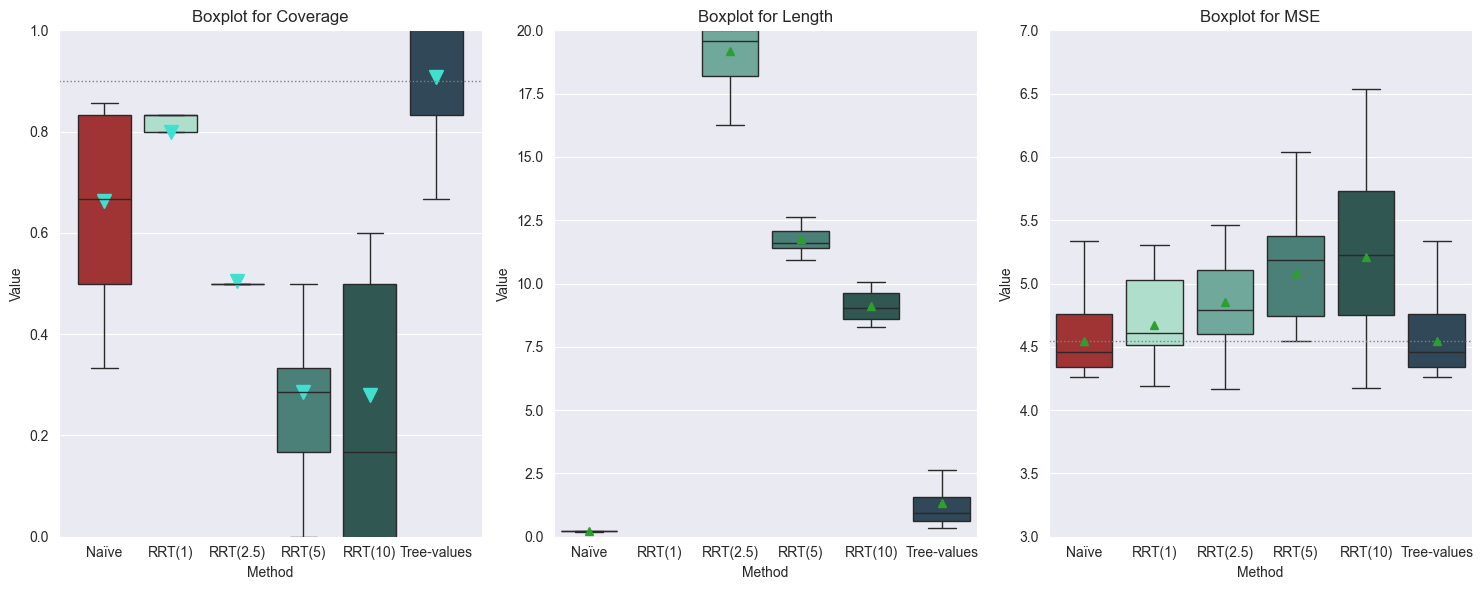

In [186]:

boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=20,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])